In [22]:
!pip install openpyxl


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset
# 指定文件路径
file_path = '附件一（训练集）.xlsx'

# 使用pandas的read_excel函数读取数据
df = pd.read_excel(file_path)

# 显示数据框架的前几行，以确保数据被正确读取
print(df.head())

   温度，oC  频率，Hz    磁芯损耗，w/m3 励磁波形  0（磁通密度B，T）         1         2         3  \
0     25  50030  1997.955250  正弦波    0.000213  0.000389  0.000566  0.000743   
1     25  50020  2427.749830  正弦波   -0.000551 -0.000358 -0.000165  0.000028   
2     25  50020  3332.725760  正弦波   -0.003780 -0.003564 -0.003349 -0.003134   
3     25  50020  4502.908007  正弦波   -0.000511 -0.000267 -0.000023  0.000222   
4     25  50030  6063.023248  正弦波    0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1014      1015      1016      1017      1018  \
0  0.000919  0.001096  ... -0.001551 -0.001374 -0.001198 -0.001022 -0.000846   
1  0.000221  0.000413  ... -0.002476 -0.002284 -0.002091 -0.001899 -0.001707   
2 -0.002919 -0.002704  ... -0.005927 -0.005713 -0.005499 -0.005285 -0.005070   
3  0.000466  0.000711  ... -0.002950 -0.002707 -0.002463 -0.002220 -0.001976   
4  0.001555  0.001830  ... -0.002290 -0.002016 -0.001741 -0.001466 -0.001192   

       1019      1020      1021      1022   

In [24]:
# 读取特定的工作表，可以是工作表的名称或索引
df1 = pd.read_excel(file_path, sheet_name='材料2')
df1=df1[df['励磁波形']=='正弦波']
df1

C:\Users\74860\AppData\Local\Temp\ipykernel_9696\1256822987.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df1[df['励磁波形']=='正弦波']


,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,25,50020,2348.679049,正弦波,-0.001165,-0.000997,-0.000830,-0.000664,-0.000497,-0.000330,...,-0.002835,-0.002668,-0.002501,-0.002334,-0.002167,-0.002000,-0.001833,-0.001666,-0.001499,-0.001332
1,25,50020,3427.045851,正弦波,-0.001916,-0.001722,-0.001528,-0.001335,-0.001141,-0.000947,...,-0.003851,-0.003657,-0.003464,-0.003271,-0.003077,-0.002884,-0.002691,-0.002498,-0.002304,-0.002110
2,25,50020,6772.981613,正弦波,0.000569,0.000820,0.001071,0.001322,0.001572,0.001823,...,-0.001941,-0.001690,-0.001439,-0.001187,-0.000936,-0.000685,-0.000434,-0.000183,0.000068,0.000318
3,25,50020,12379.944810,正弦波,0.000519,0.000835,0.001150,0.001465,0.001780,0.002096,...,-0.002644,-0.002328,-0.002012,-0.001695,-0.001379,-0.001064,-0.000747,-0.000431,-0.000115,0.000202
4,25,50020,21492.763090,正弦波,-0.002280,-0.001887,-0.001495,-0.001103,-0.000710,-0.000317,...,-0.006201,-0.005810,-0.005419,-0.005028,-0.004637,-0.004245,-0.003852,-0.003459,-0.003066,-0.002674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,25,158500,421562.216600,正弦波,0.110761,0.111126,0.111489,0.111847,0.112200,0.112549,...,0.106869,0.107277,0.107680,0.108080,0.108475,0.108867,0.109255,0.109638,0.110017,0.110391
1063,25,158500,689469.014200,正弦波,-0.033450,-0.034376,-0.035302,-0.036226,-0.037149,-0.038070,...,-0.024162,-0.025095,-0.026029,-0.026961,-0.027891,-0.028819,-0.029746,-0.030671,-0.031597,-0.032524
1064,25,199510,1221.473797,正弦波,0.009666,0.009700,0.009734,0.009767,0.009800,0.009832,...,0.009307,0.009345,0.009382,0.009419,0.009455,0.009491,0.009527,0.009562,0.009597,0.009632
1065,25,199500,1636.194271,正弦波,-0.012180,-0.012167,-0.012155,-0.012142,-0.012128,-0.012113,...,-0.012279,-0.012271,-0.012263,-0.012254,-0.012245,-0.012235,-0.012225,-0.012214,-0.012203,-0.012192


In [25]:
import numpy as np
last_1024_columns = df1.iloc[:, -1024:]
df1=df1.iloc[:, :-1025]
# 计算每一行的最大值
df1['B'] = last_1024_columns.max(axis=1)
new_column_names = {
    '温度，oC': 'T',
    '频率，Hz': 'F',
    '磁芯损耗，w/m3': 'P',
    'B': 'B'
}
df1 = df1.rename(columns=new_column_names)
df1[['T','F','P', 'B']] = np.log(df1[['T','F','P', 'B']])
df1

,T,F,P,B
0,3.218876,10.820178,7.761608,-3.594597
1,3.218876,10.820178,8.139454,-3.443143
2,3.218876,10.820178,8.820697,-3.183919
3,3.218876,10.820178,9.423833,-2.959680
4,3.218876,10.820178,9.975472,-2.739025
...,...,...,...,...
1062,3.218876,11.973510,12.951723,-2.074058
1063,3.218876,11.973510,13.443677,-1.869614
1064,3.218876,12.203620,7.107813,-4.496745
1065,3.218876,12.203570,7.400128,-4.395393


In [26]:
import numpy as np
from scipy.optimize import curve_fit

# 定义模型函数
def model_func(X, A, C, D):
    F,B=X
    return A * np.power(F, C) * np.power(B, D)

# 假设你有一些数据
F = np.array(df1['F'])  # 自变量F的值
B = np.array(df1['B'])  # 自变量B的值
P = np.array(df1['P'])  # 因变量P的值

# 将自变量组合成一个二维数组
X_data = np.vstack((F, B))

# 使用curve_fit进行拟合
params, covariance = curve_fit(model_func, X_data, P, p0=[1, 1, 1])

A, C, D = params
df1['ypred1']=A * F**C * B**D
mse1 = ((df1['P'] - df1['ypred1']) ** 2).mean()
mse1

C:\Users\74860\AppData\Local\Temp\ipykernel_9696\1040560344.py:7: RuntimeWarning: invalid value encountered in power
  return A * np.power(F, C) * np.power(B, D)
C:\Users\74860\AppData\Local\Temp\ipykernel_9696\1040560344.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(model_func, X_data, P, p0=[1, 1, 1])


nan

In [27]:
y=df1['P'].values
X=df1[['T','F','B']].values
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.00001, random_state=42)
if torch.cuda.is_available():
    train_dataset = TensorDataset(X_train.to('cuda:0'), y_train.to('cuda:0'))
    test_dataset = TensorDataset(X_test.to('cuda:0'), y_test.to('cuda:0'))

# 创建一个字典来存储数据集
dataset = {
    'train_input': train_dataset.tensors[0],
    'test_input': test_dataset.tensors[0],
    'train_label': train_dataset.tensors[1],
    'test_label':test_dataset.tensors[1]
}
dataset

{'train_input': tensor([[ 3.9120, 12.4339, -3.2399],
         [ 3.9120, 12.8945, -4.3925],
         [ 3.2189, 12.8945, -3.0163],
         ...,
         [ 3.9120, 11.5124, -2.7832],
         [ 3.2189, 11.5124, -1.6155],
         [ 3.2189, 11.5124, -3.4664]], device='cuda:0', dtype=torch.float32),
 'test_input': tensor([[ 4.2485, 12.2036, -4.4408]], device='cuda:0', dtype=torch.float32),
 'train_label': tensor([[10.4708],
         [ 8.6587],
         [12.1731],
         ...,
         [10.2230],
         [13.3364],
         [ 9.0399]], device='cuda:0', dtype=torch.float32),
 'test_label': tensor([[6.7403]], device='cuda:0', dtype=torch.float32)}

In [28]:
import torch
torch.set_default_dtype(torch.float64) # 设置默认张量数据类型为双精度浮点数
torch.manual_seed(33) # 设置随机数种子为33
from kan import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 创建一个KAN模型：
# 输入维度为2，输出维度为1，隐藏层有5个神经元
# 使用三次样条（k=3），将输入空间划分为5个网格间隔（grid=5）
# 设置随机数种子为0
model = KAN(width=[3,5,1], grid=5, k=3, seed=0,device=device)

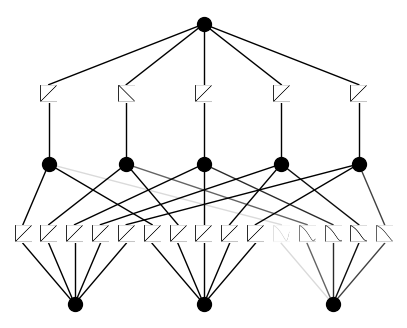

In [29]:
# 绘制初始化时的KAN模型图形
model(dataset['train_input']);
# 使用 plot 方法绘制模型的输出结果
# 设置 beta 参数为 100，用于控制平滑度
model.plot(beta=50)

In [30]:
# 对模型进行训练
# 使用 LBFGS 优化器
# 进行 20 步训练
# 设置正则化参数为 0.01
# 设置信息熵正则化参数为 10.0
# 在给定的设备上进行训练
model.train(dataset, opt="LBFGS", steps=10, lamb=0.01, lamb_entropy=10.,device=device);

description:   0%|                                                           | 0/10 [00:00<?, ?it/s]c:\Users\74860\Desktop\deep learning\kanmodel\kan\KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))
train loss: 1.38e-01 | test loss: 5.65e-02 | reg: 5.23e+01 : 100%|██| 10/10 [00:04<00:00,  2.24it/s]


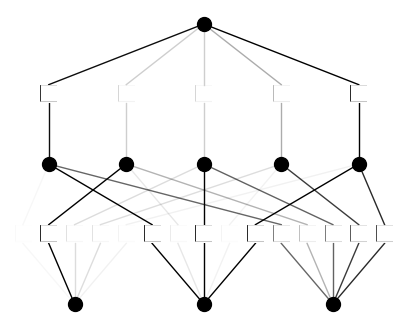

In [31]:
model.plot() # 使用 plot 方法绘制训练后的KAN模型

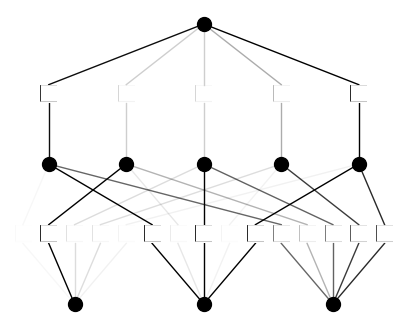

In [32]:
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)

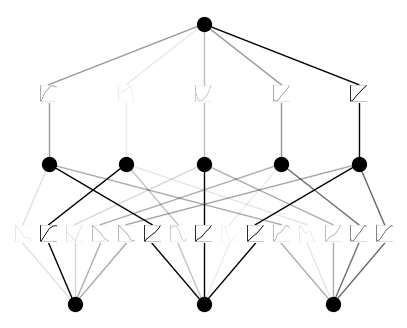

In [33]:
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 1.05e-01 | test loss: 3.59e-01 | reg: 4.39e+01 : 100%|██| 20/20 [00:31<00:00,  1.59s/it]


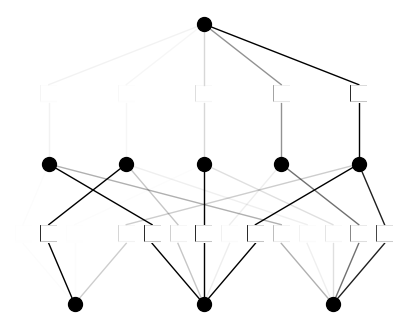

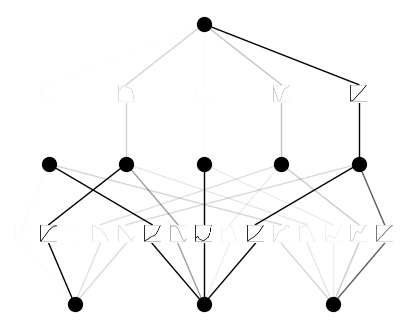

In [34]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 1.07e-01 | test loss: 3.30e-01 | reg: 4.27e+01 : 100%|██| 20/20 [00:09<00:00,  2.18it/s]


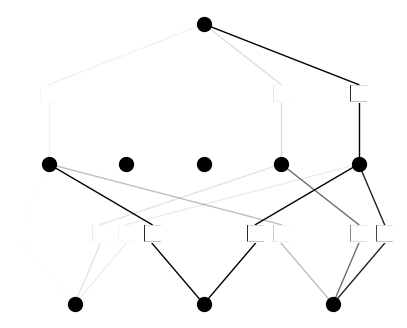

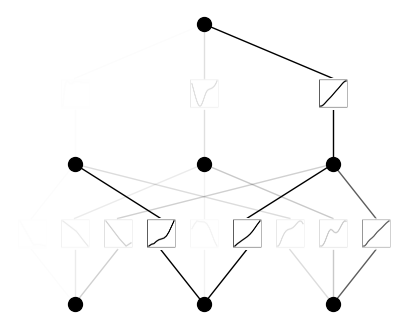

In [35]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 1.98e-01 | test loss: 3.67e-02 | reg: 2.52e+01 : 100%|██| 20/20 [00:07<00:00,  2.75it/s]


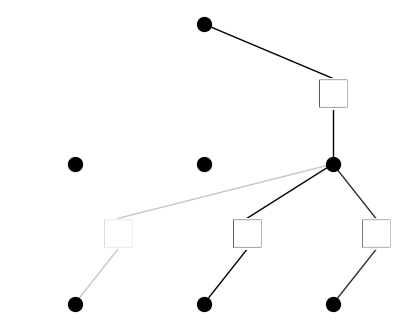

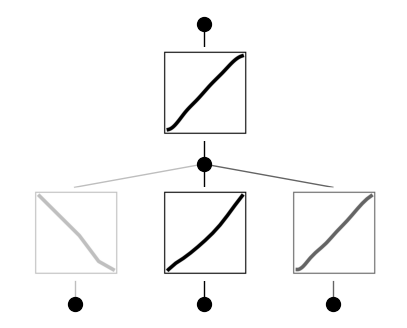

In [36]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

In [37]:
X_train

tensor([[ 3.9120, 12.4339, -3.2399],
        [ 3.9120, 12.8945, -4.3925],
        [ 3.2189, 12.8945, -3.0163],
        ...,
        [ 3.9120, 11.5124, -2.7832],
        [ 3.2189, 11.5124, -1.6155],
        [ 3.2189, 11.5124, -3.4664]], dtype=torch.float32)

In [38]:
# import shap
# explainer = shap.Explainer(model.model_predict,dataset['train_input'].cpu().numpy())  # 使用预测函数
# shap_values = explainer(dataset['train_input'].cpu().numpy())


In [39]:
# 设置 mode 变量为 "auto" 或 "manual"，以确定激活函数的设置方式
mode = "auto"  # 或者 mode = "manual"
# 如果 mode 是 "manual"，则手动设置激活函数为符号函数
if mode == "manual":
    # 手动模式下，逐个指定隐藏层和输入层的激活函数
    # 第一个参数表示层的索引，第二个和第三个参数表示神经元的索引
    # 第四个参数为要设置的激活函数，例如 'sin', 'x^2', 'exp' 等
    model.fix_symbolic(0,0,0,'x'); # 设置第一个隐藏层的第一个神经元的激活函数为正弦函数
    model.fix_symbolic(0,1,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,2,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(1,0,0,'x'); # 设置输出层的第一个神经元的激活函数为指数函数
# 如果 mode 是 "auto"，则自动设置激活函数为符号函数
elif mode == "auto":
    # 自动模式下，根据提供的激活函数库自动选择合适的符号函数作为激活函数
    lib = ['x']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.992815223794821
fixing (0,1,0) with x, r2=0.9838589421168176
fixing (0,2,0) with x, r2=0.9988635991984125
fixing (1,0,0) with x, r2=0.9989747420710491


In [40]:
model.symbolic_formula()[0][0] # 获取模型的符号化公式
df1['ypred']=-0.59*df1['T']+1.72*df1['F']+2.52*df1['B']-0.28
# df1

In [41]:
!pip install statsmodels


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
X = df1[['F', 'B']]
y=df1['P']
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.162e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:51:01   Log-Likelihood:                -525.30
No. Observations:                1067   AIC:                             1057.
Df Residuals:                    1064   BIC:                             1072.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5210      0.221    -11.386      0.0

In [43]:
df1['ypred1']=-2.5210+   1.7109  *df1['F']+2.5175*df1['B']
df1

,T,F,P,B,ypred1,ypred
0,3.218876,10.820178,7.761608,-3.594597,6.941845,7.373186
1,3.218876,10.820178,8.139454,-3.443143,7.323130,7.754849
2,3.218876,10.820178,8.820697,-3.183919,7.975727,8.408095
3,3.218876,10.820178,9.423833,-2.959680,8.540248,8.973176
4,3.218876,10.820178,9.975472,-2.739025,9.095748,9.529228
...,...,...,...,...,...,...
1062,3.218876,11.973510,12.951723,-2.074058,12.743037,13.188674
1063,3.218876,11.973510,13.443677,-1.869614,13.257726,13.703874
1064,3.218876,12.203620,7.107813,-4.496745,7.037617,7.479292
1065,3.218876,12.203570,7.400128,-4.395393,7.292686,7.734613


In [44]:
mse = ((np.exp(df1['P']) - np.exp(df1['ypred'])) ** 2).mean()
mse1 = ((np.exp(df1['P']) - np.exp(df1['ypred1'])) ** 2).mean()
print(mse,mse1)

964277161.8018208 1485248592.4417639


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# 加载数据集
data = df1
X = df1[['T','F', 'B']]
y=df1['P']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.00001, random_state=42)

# 创建随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 预测测试集
y_pred = rf.predict(X_train)

# 计算均方误差
mse = mean_squared_error(np.exp(y_train), np.exp(y_pred))
print(f"Mean Squared Error: {mse}")

# # 打印模型的特征重要性
# print("Feature importances:")
# for name, importance in zip(data.feature_names, rf.feature_importances_):
#     print(f"{name}: {importance}")

Mean Squared Error: 63246569.44779392


: 